## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import *

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_colwidth', None)

## Import Data

In [ ]:
path = '/content/drive/MyDrive/Y4_T2/Data Mining/Web-Usage Mining/'

In [3]:
data = pd.read_csv(path+'server_logs.csv')

In [4]:
data = data.drop(columns='Unnamed: 0')

In [12]:
data.shape

(10364865, 7)

## Frequent Visitors

* Find 10 people who visited the site frequently, show the information that identifies the people and state why you identify these people as frequent visitors.  [5 Marks]  

In [ ]:
# identifiers - ip and client device
data.Client_IP_address.nunique()

258445

In [ ]:
data.Client_Device.nunique()

28338

In [8]:
freq = {}
for i in range(0, data.shape[0]):
  if (tuple((data.Client_IP_address[i], data.Client_Device[i])) in freq):
    freq[tuple((data.Client_IP_address[i], data.Client_Device[i]))]+=1
  else:
    freq[tuple((data.Client_IP_address[i], data.Client_Device[i]))]=1

In [ ]:
freq_df = pd.DataFrame.from_dict(freq, orient='index').reset_index()

In [ ]:
freq_df.shape

(295087, 2)

In [ ]:
freq_df.columns = ['Identifier','Visits']

In [ ]:
freq_df.sort_values(by='Visits', ascending=False).head(10)

,Identifier,Visits
8,"(66.249.66.194, Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Build/MMB29P) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.96 Mobile Safari/537.36 (compatible; Googlebot/2.1; +http://www.google.com/bot.html))",257701
425,"(66.249.66.91, Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Build/MMB29P) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.96 Mobile Safari/537.36 (compatible; Googlebot/2.1; +http://www.google.com/bot.html))",125945
14,"(66.249.66.91, Googlebot-Image/1.0)",108930
4,"(66.249.66.194, Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html))",88879
9,"(66.249.66.91, Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html))",79180
881,"(66.249.66.92, Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Build/MMB29P) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.96 Mobile Safari/537.36 (compatible; Googlebot/2.1; +http://www.google.com/bot.html))",42442
257818,"(104.222.32.91, Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0)",41882
4304,"(91.99.30.32, Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0)",31632
652,"(66.249.66.92, Googlebot-Image/1.0)",31366
73238,"(195.181.168.181, Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0)",27803


**Explanation:** 

A unique user is identified using the ip address and device used. Since ip addresses are not unique to a user, as it's the public ip, we need to uniquely identifier a user using a combination of the ip and device used. The highest counts of unique user visits are then the frequent visitors.

## Sessionization

* Show at least five sessions and the page views per each session.        [5 Marks]                  

In [9]:
time=[]
client=[]
page=[]

In [14]:
sample_logs=data.sample(frac=0.0001, replace=True, random_state=1)

In [15]:
sample_logs.shape

(1036, 7)

In [17]:
for i in list(freq)[:500]:
    for j, row in sample_logs.iterrows():
        if(i==tuple((row['Client_IP_address'],row['Client_Device']))):
            time.append(row['Time_of_activity'])
            client.append(i) 
            page.append(row['Requested_Page'])

In [18]:
sessions_df=pd.DataFrame({'Time':time,'Client':client,'Pages':page})

In [19]:
sessions_df.head()

,Time,Client,Pages
0,2019-01-22 03:56:14,"(54.36.149.41, Mozilla/5.0 (compatible; Ahrefs...",GET /filter/27|13%20%D9%85%DA%AF%D8%A7%D9%BE%D...
1,2019-01-22 04:06:30,"(54.36.149.41, Mozilla/5.0 (compatible; Ahrefs...",GET /login/auth?forwardUri=%2Ffilter%2Fb33%2Cp...
2,2019-01-22 04:08:40,"(54.36.149.41, Mozilla/5.0 (compatible; Ahrefs...",GET /blog/cosmetic/%DA%86%DA%AF%D9%88%D9%86%D9...
3,2019-01-22 04:55:21,"(54.36.149.41, Mozilla/5.0 (compatible; Ahrefs...","GET /filter/5970|%D8%AA%D9%84%D8%AE,b445,p6446"
4,2019-01-22 06:55:15,"(54.36.149.41, Mozilla/5.0 (compatible; Ahrefs...","GET /filter/b192,p13010,v1|%D8%B3%D9%81%DB%8C%..."


### Time Heuristics

In [ ]:
data.Time_of_activity = data.Time_of_activity.str[:-6]

In [ ]:
data.Time_of_activity = data.Time_of_activity.apply(lambda x: x.replace('Jan', '01'))

In [ ]:
data.Time_of_activity = pd.to_datetime(data.Time_of_activity)

In [ ]:
data = data.sort_values(['Client_IP_address', 'Client_Device', 'Time_of_activity'])

In [ ]:
# maximum duration - 30 minutes
data['Session'] = (
        (data.Client_IP_address != data.Client_IP_address.shift()) | 
        (data.Client_Device != data.Client_Device.shift()) | 
        (((data.Time_of_activity - data.Time_of_activity.shift())/timedelta(minutes=1)) > 30)
        ).astype(int).cumsum()

In [ ]:
data['Visit'] = data.groupby('Session')['Session'].transform(lambda x: range(1, len(x) + 1))

In [ ]:
data = data.sort_index()

In [ ]:
data[['Client_IP_address','Client_Device','Visit','Requested_Page','Time_of_activity']].head()

,Client_IP_address,Client_Device,Visit,Requested_Page,Time_of_activity
0,54.36.149.41,Mozilla/5.0 (compatible; AhrefsBot/6.1; +http://ahrefs.com/robot/),1,"GET /filter/27|13%20%D9%85%DA%AF%D8%A7%D9%BE%DB%8C%DA%A9%D8%B3%D9%84,27|%DA%A9%D9%85%D8%AA%D8%B1%20%D8%A7%D8%B2%205%20%D9%85%DA%AF%D8%A7%D9%BE%DB%8C%DA%A9%D8%B3%D9%84,p53",2019-01-22 03:00:00
1,31.56.96.51,"Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build/HuaweiALE-L21) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.158 Mobile Safari/537.36",1,GET /image/60844/productModel/200x200,2019-01-22 03:00:00
2,31.56.96.51,"Mozilla/5.0 (Linux; Android 6.0; ALE-L21 Build/HuaweiALE-L21) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.158 Mobile Safari/537.36",2,GET /image/61474/productModel/200x200,2019-01-22 03:00:00
3,40.77.167.129,Mozilla/5.0 (compatible; bingbot/2.0; +http://www.bing.com/bingbot.htm),1,GET /image/14925/productModel/100x100,2019-01-22 03:00:00
4,91.99.72.15,Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:16.0)Gecko/16.0 Firefox/16.0,1,GET /product/31893/62100/%D8%B3%D8%B4%D9%88%D8%A7%D8%B1-%D8%AE%D8%A7%D9%86%DA%AF%DB%8C-%D9%BE%D8%B1%D9%86%D8%B3%D9%84%DB%8C-%D9%85%D8%AF%D9%84-PR257AT,2019-01-22 03:00:00


In [ ]:
data.sort_values(by='Visit', ascending=False)[['Client_IP_address','Client_Device','Visit','Requested_Page','Time_of_activity']].head()

,Client_IP_address,Client_Device,Visit,Requested_Page,Time_of_activity
10291656,104.222.32.91,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0,9076,"GET /rapidGrails/jsonList?maxColumns=16&domainClass=eshop.Order&filter=[{op:%27inSession%27,%20field:%27id%27,%20val:%27orderList59a659916f554fbf90b526969aa62827%27}]&columns=[{%27name%27:%27trackingCode%27,%27width%27:110},{%27name%27:%27ownerName%27,%27width%27:120},{%27name%27:%27productsName%27,%27width%27:320,%27sortable%27:false},{%27name%27:%27ownerMobile%27,%27width%27:110},{%27name%27:%27deliveryMethodName%27,%27width%27:120,%27sortable%27:false},{%27name%27:%27deliveryCityName%27,%27width%27:120,%27sortable%27:false},{%27name%27:%27addressRegionName%27,%27width%27:120,%27sortable%27:false},{%27name%27:%27courier%27,%27width%27:120,%27expression%27:%27obj[\x5C%27courier\x5C%27]?.fullName%27},{%27name%27:%27status%27,%27width%27:110},{%27name%27:%27invoiceType%27,%27width%27:60,%27expression%27:%27g.message(code:%20obj[\x5C%27invoiceTypeCode\x5C%27])%27},{%27name%27:%27itemsDeliveryStatus%27,%27width%27:60},{%27name%27:%27creationType%27,%27width%27:50},{%27name%27:%27creationMedia%27,%27width%27:50},{%27name%27:%27completionMedia%27,%27width%27:50},{%27name%27:%27completionFollower%27,%27width%27:120},{%27name%27:%27lastActionDate%27,%27width%27:100,%27expression%27:%27rg.formatJalaliDate(date:%20%20obj[\x5C%27lastActionDate\x5C%27],%20hm:\x5C%27true\x5C%27%20)%27}]&_search=false&nd=1548520055252&rows=10&page=1&sidx=lastActionDate&sord=desc",2019-01-26 19:00:00
10291655,104.222.32.91,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0,9075,"GET /rapidGrails/jsonList?maxColumns=16&domainClass=eshop.Order&filter=[{op:%27inSession%27,%20field:%27id%27,%20val:%27orderListd4c854f14a844e4e809635a26829120c%27}]&columns=[{%27name%27:%27trackingCode%27,%27width%27:110},{%27name%27:%27ownerName%27,%27width%27:120},{%27name%27:%27productsName%27,%27width%27:320,%27sortable%27:false},{%27name%27:%27ownerMobile%27,%27width%27:110},{%27name%27:%27deliveryMethodName%27,%27width%27:120,%27sortable%27:false},{%27name%27:%27deliveryCityName%27,%27width%27:120,%27sortable%27:false},{%27name%27:%27addressRegionName%27,%27width%27:120,%27sortable%27:false},{%27name%27:%27courier%27,%27width%27:120,%27expression%27:%27obj[\x5C%27courier\x5C%27]?.fullName%27},{%27name%27:%27status%27,%27width%27:110},{%27name%27:%27invoiceType%27,%27width%27:60,%27expression%27:%27g.message(code:%20obj[\x5C%27invoiceTypeCode\x5C%27])%27},{%27name%27:%27itemsDeliveryStatus%27,%27width%27:60},{%27name%27:%27creationType%27,%27width%27:50},{%27name%27:%27creationMedia%27,%27width%27:50},{%27name%27:%27completionMedia%27,%27width%27:50},{%27name%27:%27completionFollower%27,%27width%27:120},{%27name%27:%27lastActionDate%27,%27width%27:100,%27expression%27:%27rg.formatJalaliDate(date:%20%20obj[\x5C%27lastActionDate\x5C%27],%20hm:\x5C%27true\x5C%27%20)%27}]&_search=false&nd=1548520133849&rows=10&page=1&sidx=lastActionDate&sord=desc",2019-01-26 19:00:00
10291654,104.222.32.91,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0,9074,"GET /rapidGrails/jsonList?maxColumns=16&domainClass=eshop.Order&filter=[{op:%27inSession%27,%20field:%27id%27,%20val:%27orderList449a36e08432474584bc506a620e5acd%27}]&columns=[{%27name%27:%27trackingCode%27,%27width%27:110},{%27name%27:%27ownerName%27,%27width%27:120},{%27name%27:%27productsName%27,%27width%27:320,%27sortable%27:false},{%27name%27:%27ownerMobile%27,%27width%27:110},{%27name%27:%27deliveryMethodName%27,%27width%27:120,%27sortable%27:false},{%27name%27:%27deliveryCityName%27,%27width%27:120,%27sortable%27:false},{%27name%27:%27addressRegionName%27,%27width%27:120,%27sortable%27:false},{%27name%27:%27courier%27,%27width%27:120,%27expression%27:%27obj[\x5C%27courier\x5C%27]?.fullName%27},{%27name%27:%27status%27,%27width%27:110},{%27name%27:%27invoiceType%27,%27width%27:60,%27expression%27:%27g.

## Referrers

* Show five frequent pages which the users visit before visiting this particular web site.     [5 Marks]

In [ ]:
from urllib.parse import urlparse

In [ ]:
referers = data['Referer_page'].dropna(how='all')

In [ ]:
ref=[]

In [ ]:
for i in referers:       
    parsed_uri = urlparse(i.replace('"', ''))
    result = '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri)
    ref.append(result)

In [ ]:
word_counter = {}
for url in ref:
    if url in word_counter:
        word_counter[url] += 1
    else:
        word_counter[url] = 1

In [ ]:
popular_words = sorted(word_counter, key = word_counter.get, reverse = True)

In [ ]:
top_5 = popular_words[:6]

In [ ]:
for i in top_5:
    if(i==':///'''):
        top_5.remove(i)
for i,j in enumerate(top_5,start=1):
    print(i,"",j)

1  https://www.zanbil.ir/
2  https://znbl.ir/
3  https://torob.com/
4  https://www.google.com/
5  https://www-zanbil-ir.cdn.ampproject.org/


## Training Data

In [20]:
page_views = {}
for i,row in sessions_df.iterrows():
    if(row['Client'] in page_views):
        page_views[row['Client']].append(row['Pages'])    
    else:
        page_views[row['Client']]=[row['Pages']]

In [21]:
for i in page_views:
    print('\n Client {} accessed these pages \n {} \n'.format(i,page_views[i]))


 Client ('54.36.149.41', 'Mozilla/5.0 (compatible; AhrefsBot/6.1; +http://ahrefs.com/robot/)') accessed these pages 
 ['GET /filter/27|13%20%D9%85%DA%AF%D8%A7%D9%BE%DB%8C%DA%A9%D8%B3%D9%84,27|%DA%A9%D9%85%D8%AA%D8%B1%20%D8%A7%D8%B2%205%20%D9%85%DA%AF%D8%A7%D9%BE%DB%8C%DA%A9%D8%B3%D9%84,p53', 'GET /login/auth?forwardUri=%2Ffilter%2Fb33%2Cp47%2Crf5000000%2Crt10000000%2Cstexists', 'GET /blog/cosmetic/%DA%86%DA%AF%D9%88%D9%86%D9%87-%D9%86%D8%A7%D8%AE%D9%86-%D9%87%D8%A7%DB%8C-%D8%B7%D8%A8%DB%8C%D8%B9%DB%8C-%D9%88-%D8%B2%DB%8C%D8%A8%D8%A7%DB%8C%DB%8C-%D8%AF%D8%A7%D8%B4%D8%AA%D9%87-%D8%A8%D8%A7%D8%B4/', 'GET /filter/5970|%D8%AA%D9%84%D8%AE,b445,p6446', 'GET /filter/b192,p13010,v1|%D8%B3%D9%81%DB%8C%D8%AF', 'GET /filter/b632%2Cp1%2Cb3', 'GET /filter/b656,b854', 'GET /product/34294/%D9%84%D9%BE-%D8%AA%D8%A7%D9%BE-%D9%84%D9%86%D9%88%D9%88-%D9%85%D8%AF%D9%84-Lenovo-Ideapad-520', 'GET /filter/p11675,v1|%D8%B7%D9%88%D8%B3%DB%8C%20%D8%B3%D8%A8%D8%B2,v1|%D8%B7%D9%88%D8%B3%DB%8C%20%D8%B5%D9%88%D8%B1%

In [22]:
all=[]
for i in page_views:
    all.append(page_views[i])

In [23]:
len(all)

142

## Association rule mining

* Using the apriori algorithm show the web pages that are frequently visited together with a support ratio not less than 25%.                                    [5 Marks]

In [24]:
!pip install apyori

In [25]:
from apyori import apriori  

In [58]:
association_rules = apriori(all, min_support=0.01, min_confidence=0.05, min_lift=0.5, min_length=1) 

In [59]:
association_results = list(association_rules)

In [60]:
support=[]
items=[]
rhs=[]
lhs=[]
con=[]
lift=[]

In [61]:
for i in association_results:
    support.append(i.support)
    items.append(i.items)
    rhs.append(i.ordered_statistics[0][1])
    lhs.append(i.ordered_statistics[0][0])
    con.append(i.ordered_statistics[0][2])
    lift.append(i.ordered_statistics[0][3])    

In [62]:
df=pd.DataFrame({'Items':items,'Antecedent':lhs,'Precedent':rhs,'Support':support,'Confidence':con,'Lift':lift})

In [63]:
df.head()

,Items,Antecedent,Precedent,Support,Confidence,Lift
0,(GET /settings/logo),(),(GET /settings/logo),0.056338,0.056338,1.000000
1,"(GET /favicon.ico, GET /image/879/brand)",(GET /favicon.ico),(GET /image/879/brand),0.014085,0.666667,47.333333
2,"(GET /favicon.ico, GET /image/99/brand)",(GET /favicon.ico),(GET /image/99/brand),0.014085,0.666667,47.333333
3,"(GET /settings/logo, GET /favicon.ico)",(GET /favicon.ico),(GET /settings/logo),0.014085,0.666667,11.833333
4,"(GET /static/css/font/wyekan/font.woff, GET /f...",(GET /favicon.ico),(GET /static/css/font/wyekan/font.woff),0.014085,0.666667,23.666667


In [64]:
for i,items in df.iterrows():
    print("Rule: " + str(items['Antecedent']) + " -> " + str(items['Precedent']))
    print("Support: " + str(items['Support']))
    print("Confidence: " + str(items['Confidence']))
    print("Lift: " + str(items['Lift']))
    print("=====================================")

Streaming output truncated to the last 5000 lines.
Rule: frozenset({'GET /favicon.ico'}) -> frozenset({'GET /static/images/guarantees/goodShopping.png', 'GET /static/images/amp/telegram.png', 'GET /image/879/brand', 'GET /static/images/guarantees/bestPrice.png', 'GET /static/images/guarantees/fastDelivery.png', 'GET /static/images/guarantees/support.png', 'GET /static/css/font/wyekan/font.woff', 'GET /static/images/amp/third-party/footer-mobile.png', 'GET /static/images/amp/blog.png'})
Support: 0.014084507042253521
Confidence: 0.6666666666666667
Lift: 47.333333333333336
Rule: frozenset({'GET /favicon.ico'}) -> frozenset({'GET /static/images/guarantees/goodShopping.png', 'GET /static/images/guarantees/warranty.png', 'GET /static/images/amp/telegram.png', 'GET /image/879/brand', 'GET /static/images/guarantees/bestPrice.png', 'GET /static/images/guarantees/fastDelivery.png', 'GET /static/css/font/wyekan/font.woff', 'GET /static/images/amp/third-party/footer-mobile.png', 'GET /static/image

In [65]:
support=df[df['Support']>=0.25].sort_values('Support',ascending=False)

In [66]:
support

,Items,Antecedent,Precedent,Support,Confidence,Lift


In [73]:
df.sort_values('Support',ascending=False)

,Items,Antecedent,Precedent,Support,Confidence,Lift
0,(GET /settings/logo),(),(GET /settings/logo),0.056338,0.056338,1.000000
374,(GET /static/images/amp/third-party/footer-mob...,(GET /static/images/amp/blog.png),(GET /static/images/amp/third-party/footer-mob...,0.028169,1.000000,35.500000
66,(GET /static/images/amp/third-party/footer-mob...,(GET /static/images/amp/instagram.png),(GET /static/images/amp/third-party/footer-mob...,0.028169,1.000000,35.500000
65,"(GET /static/images/amp/instagram.png, GET /st...",(GET /static/images/amp/instagram.png),(GET /static/images/amp/telegram.png),0.028169,1.000000,23.666667
72,(GET /static/images/amp/third-party/footer-mob...,(GET /static/images/amp/telegram.png),(GET /static/images/amp/third-party/footer-mob...,0.028169,0.666667,23.666667
...,...,...,...,...,...,...
5486,"(GET /static/images/guarantees/warranty.png, G...",(GET /image/879/brand),"(GET /static/images/guarantees/warranty.png, G...",0.014085,1.000000,71.000000
5487,(GET /static/images/guarantees/goodShopping.pn...,(GET /image/879/brand),(GET /static/images/guarantees/goodShopping.pn...,0.014085,1.000000,71.000000
5488,"(GET /static/images/amp/telegram.png, GET /ima...",(GET /image/879/brand),"(GET /static/images/amp/telegram.png, GET /sta...",0.014085,1.000000,71.000000
5489,"(GET /static/images/guarantees/warranty.png, G...",(GET /image/879/brand),"(GET /static/images/guarantees/warranty.png, G...",0.014085,1.000000,71.000000


## Association rules

* Show the association rules with lift values not less than 2.05                  [5 Marks]

In [67]:
lift=df[df['Lift']>=2.05].sort_values('Lift',ascending=False)

In [68]:
lift

,Items,Antecedent,Precedent,Support,Confidence,Lift
8186,"(GET /image/99/brand, GET /static/images/amp/t...",(GET /image/879/brand),"(GET /image/99/brand, GET /static/images/amp/t...",0.014085,1.000000,71.000000
5920,(GET /static/images/guarantees/goodShopping.pn...,(GET /image/99/brand),(GET /static/images/guarantees/goodShopping.pn...,0.014085,1.000000,71.000000
5932,"(GET /image/99/brand, GET /static/images/guara...",(GET /image/99/brand),"(GET /static/images/guarantees/warranty.png, G...",0.014085,1.000000,71.000000
5931,"(GET /image/99/brand, GET /static/images/guara...",(GET /image/99/brand),"(GET /static/images/guarantees/bestPrice.png, ...",0.014085,1.000000,71.000000
5930,(GET /static/images/guarantees/goodShopping.pn...,(GET /image/99/brand),(GET /static/images/guarantees/goodShopping.pn...,0.014085,1.000000,71.000000
...,...,...,...,...,...,...
44,"(GET /settings/logo, GET /static/images/guaran...",(GET /settings/logo),(GET /static/images/guarantees/fastDelivery.png),0.014085,0.250000,8.875000
45,(GET /static/images/guarantees/goodShopping.pn...,(GET /settings/logo),(GET /static/images/guarantees/goodShopping.png),0.014085,0.250000,8.875000
47,"(GET /settings/logo, GET /static/images/guaran...",(GET /settings/logo),(GET /static/images/guarantees/warranty.png),0.014085,0.250000,7.100000
73,"(GET /static/images/guarantees/bestPrice.png, ...",(GET /static/images/amp/telegram.png),(GET /static/images/guarantees/bestPrice.png),0.014085,0.333333,6.761905


## Sequence Mining

* Find at least ten frequent sequential patterns or navigational patterns which the users follow using the GSP algorithm, state your own support value and maximum length of item_set.                                                                                     [5 Marks] 

In [89]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
"""
===============================================
GSP (Generalized Sequential Pattern) algorithm
===============================================
GSP algorithm made with Python3 to deal with arrays as transactions.
Example:
transactions = [
                ['Bread', 'Milk'],
                ['Bread', 'Diaper', 'Beer', 'Eggs'],
                ['Milk', 'Diaper', 'Beer', 'Coke'],
                ['Bread', 'Milk', 'Diaper', 'Beer'],
                ['Bread', 'Milk', 'Diaper', 'Coke']
            ]
"""

import logging
import multiprocessing as mp
from collections import Counter
from itertools import chain
from itertools import product

import numpy as np

__author__ = ""
__email__ = ""
__license__ = "GPL"
__version__ = "1.0"


class GSP:

    def __init__(self, raw_transactions):
        self.freq_patterns = []
        self._pre_processing(raw_transactions)

    def _pre_processing(self, raw_transactions):
        '''
        Prepare the data
        Parameters:
                raw_transactions: the data that it will be analysed
        '''
        self.max_size = max([len(item) for item in raw_transactions])
        self.transactions = [tuple(list(i)) for i in raw_transactions]
        counts = Counter(chain.from_iterable(raw_transactions))
        self.unique_candidates = [tuple([k]) for k, c in counts.items()]

    def _is_slice_in_list(self, s, l):
        len_s = len(s)  # so we don't recompute length of s on every iteration
        return any(s == l[i:len_s + i] for i in range(len(l) - len_s + 1))

    def _calc_frequency(self, results, item, minsup):
        # The number of times the item appears in the transactions
        frequency = len(
            [t for t in self.transactions if self._is_slice_in_list(item, t)])
        if frequency >= minsup:
            results[item] = frequency
        return results

    def _support(self, items, minsup=0):
        '''
        The support count (or simply support) for a sequence is defined as
        the fraction of total data-sequences that "contain" this sequence.
        (Although the word "contains" is not strictly accurate once we
        incorporate taxonomies, it captures the spirt of when a data-sequence
        contributes to the support of a sequential pattern.)
        Parameters
                items: set of items that will be evaluated
                minsup: minimum support
        '''
        results = mp.Manager().dict()
        pool = mp.Pool(processes=mp.cpu_count())

        for item in items:
            pool.apply_async(self._calc_frequency,
                             args=(results, item, minsup))
        pool.close()
        pool.join()

        return dict(results)

    def _print_status(self, run, candidates):
        logging.debug("""
        Run {}
        There are {} candidates.
        The candidates have been filtered down to {}.\n"""
                      .format(run,
                              len(candidates),
                              len(self.freq_patterns[run - 1])))

    def search(self, minsup=0.2):
        '''
        Run GSP mining algorithm
        Parameters
                minsup: minimum support
        '''
        assert (0.0 < minsup) and (minsup <= 1.0)
        minsup = len(self.transactions) * minsup

        # the set of frequent 1-sequence: all singleton sequences
        # (k-itemsets/k-sequence = 1) - Initially, every item in DB is a
        # candidate
        candidates = self.unique_candidates

        # scan transactions to collect support count for each candidate
        # sequence & filter
        self.freq_patterns.append(self._support(candidates, minsup))

        # (k-itemsets/k-sequence = 1)
        k_items = 1

        self._print_status(k_items, candidates)

        # repeat until no frequent sequence or no candidate can be found
        while len(self.freq_patterns[k_items - 1]) and (k_items + 1 <= self.max_size):
            k_items += 1

            # Generate candidate sets Ck (set of candidate k-sequences) -
            # generate new candidates from the last "best" candidates filtered
            # by minimum support
            items = np.unique(
                list(set(self.freq_patterns[k_items - 2].keys())))

            candidates = list(product(items, repeat=k_items))

            # candidate pruning - eliminates candidates who are not potentially
            # frequent (using support as threshold)
            self.freq_patterns.append(self._support(candidates, minsup))

            self._print_status(k_items, candidates)
        return self.freq_patterns[:-1]


In [90]:
import argparse
import logging
import random

In [92]:
logging.basicConfig(level=logging.DEBUG)
transactions=all
result = GSP(transactions).search(0.2)

DEBUG:root:
        Run 1
        There are 677 candidates.
        The candidates have been filtered down to 0.



## Clustering
                              
* Create a graph that shows clusters of users with similar  navigational patterns. [5 Marks]

In [75]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [80]:
train=[]
for i in range(0,len(all)):
  train+=all[i]

In [81]:
len(train)

873

In [82]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(train)

In [83]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette', timings=False)      

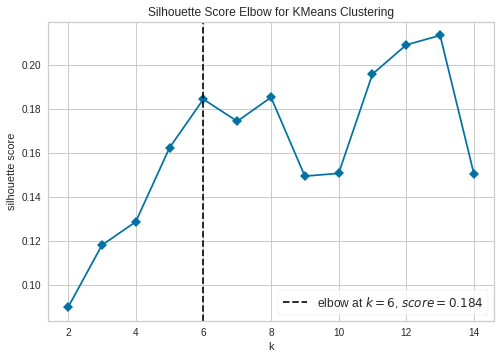

In [84]:
visualizer.fit(X) 
visualizer.show()

In [85]:
k = 6
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=6, n_init=1)

In [87]:
print("Top pages per cluster:\n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print("\n")

Top pages per cluster:

Cluster 0:
 png
 images
 static
 guarantees
 amp
 warranty
 bestprice
 fastdelivery
 telegram
 goodshopping


Cluster 1:
 62423
 150x150
 productmodel
 image
 2fb33
 2ct13
 2ct14
 2ct154
 2ct48
 2cv1


Cluster 2:
 d8
 d9
 db
 8c
 a7
 b1
 da
 85
 af
 88


Cluster 3:
 page
 2cb226
 2cb249
 2cb723
 2cb221
 2cb99
 2cb20
 2cb523
 2cb183
 2cb194


Cluster 4:
 60862
 200x200
 productmodel
 image
 30331
 2fb33
 2ct13
 2ct14
 2ct154
 2ct48


Cluster 5:
 image
 productmodel
 200x200
 filter
 font
 settings
 logo
 brand
 150x150
 wh




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


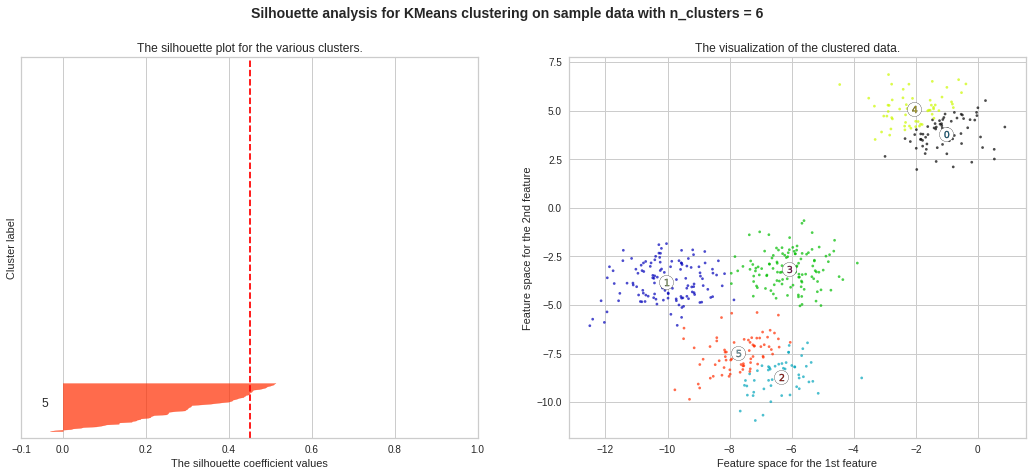

In [88]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

k = 6

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (k + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
clusterer = KMeans(n_clusters=k, random_state=10)
cluster_labels = clusterer.fit_predict(X)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print(
    "For n_clusters =",
    k,
    "The average silhouette_score is :",
    silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10

# Aggregate the silhouette scores for samples belonging to
# cluster i, and sort them
ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

ith_cluster_silhouette_values.sort()

size_cluster_i = ith_cluster_silhouette_values.shape[0]
y_upper = y_lower + size_cluster_i

color = cm.nipy_spectral(float(i) / k)
ax1.fill_betweenx(
    np.arange(y_lower, y_upper),
    0,
    ith_cluster_silhouette_values,
    facecolor=color,
    edgecolor=color,
    alpha=0.7,
)

# Label the silhouette plots with their cluster numbers at the middle
ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

# Compute the new y_lower for next plot
y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
ax2.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % k,
    fontsize=14,
    fontweight="bold",
)

plt.show()